# Introduction

Support Vector Machine is a supervised machine learning algorithm widely used to solve various machine learning problems. Given a set of data, the algorithm will try to subdivide the data using the hyperplane and then make predictions. SVM is a non-probability linear classifier. While other classifiers, when classifying, predict the probability that a data point belongs to one group or another, the  SVM directly tells which group the data point belongs to without using  probability calculations.

## Python Implementation

### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset

In [2]:
df=pd.read_csv('data_banknote_authentication.txt',names = ["variance","skewness","kurtosis","entropy","class"])

In [3]:
df.head() #display top five observation

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.tail() #display bottom five observation

,variance,skewness,kurtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


### About dataset :
    
We uses Banknote Dataset that involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 1,372 observations with 4 input variables and 1 output variable. The variable names are as follows:

Variance of Wavelet Transformed image (continuous).

Skewness of Wavelet Transformed image (continuous).

Kurtosis of Wavelet Transformed image (continuous).

Entropy of image (continuous).

Class (0 for authentic, 1 for inauthentic).

### data profilling

In [5]:
## shape of dataset
df.shape

(1372, 5)

In [6]:
## datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   kurtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
## check null value
df.isnull().sum()

variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64

### EDA of dataset

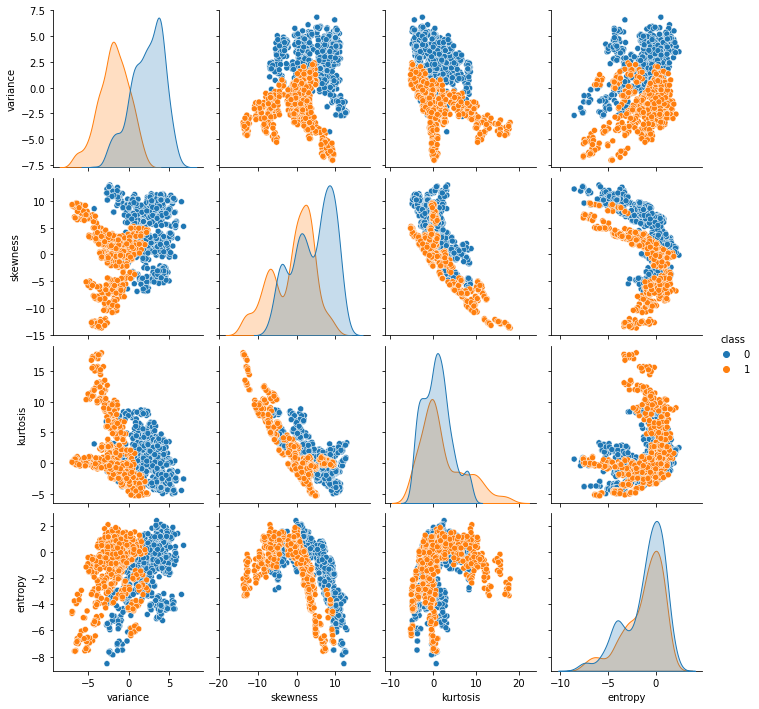

In [8]:
sns.pairplot(data = df , hue = "class")

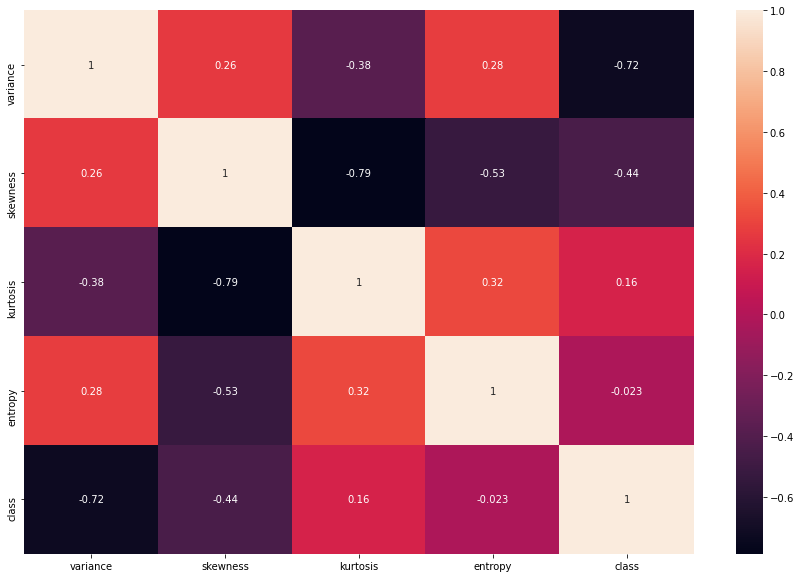

In [9]:
## correlation map
plt.figure(figsize=(15,10), facecolor='white')
sns.heatmap(data = df.corr(), annot=True)

In [10]:
#correlation value of ''class' column with other columns
df.corr()['class'][:-1].sort_values(ascending=False)

kurtosis    0.155883
entropy    -0.023424
skewness   -0.444688
variance   -0.724843
Name: class, dtype: float64

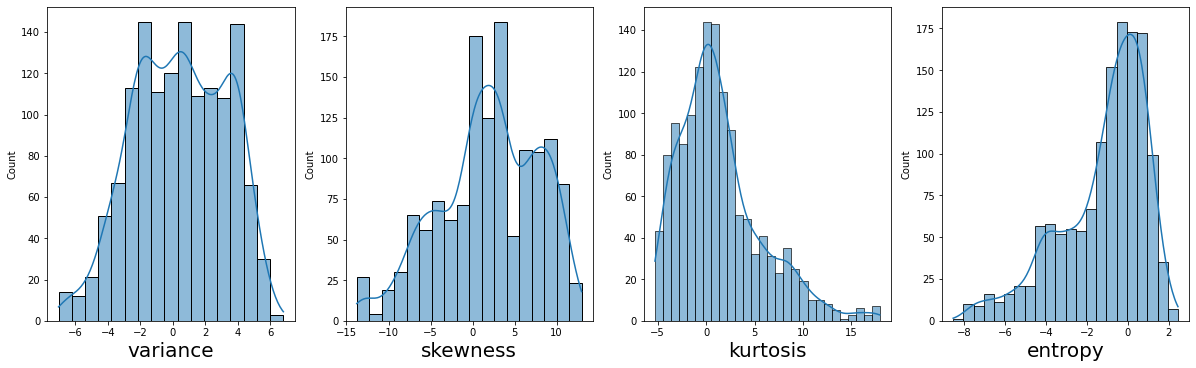

In [11]:
# let's see how data is distributed for every column
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<=4:
        ax = plt.subplot(6,6,plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

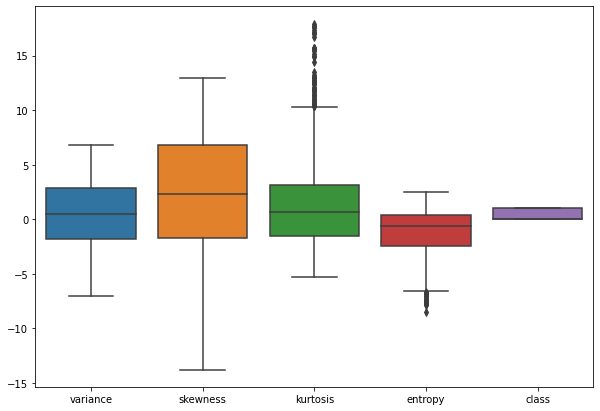

In [12]:
## Boxplot
plt.figure(figsize = (10,7))
sns.boxplot(data = df)
plt.show()

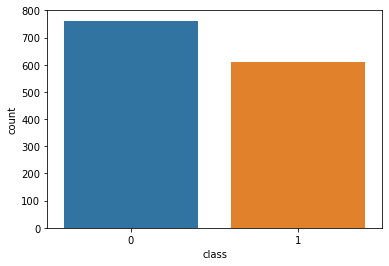

In [13]:
## distribution of 'class' feature
sns.countplot(x = 'class' , data = df)

### data preprocessing

In [14]:
### standard scaling of data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
new_data=scaler.fit_transform(df.drop(labels=['class'],axis=1))

In [15]:
df.columns

Index(['variance', 'skewness', 'kurtosis', 'entropy', 'class'], dtype='object')

In [16]:
columns=['variance', 'skewness', 'kurtosis', 'entropy']

In [17]:
new_df=pd.DataFrame(data=new_data,columns=columns)

In [18]:
new_df.head()

,variance,skewness,kurtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


As there are no missing values, we don't need to perform data imputation method.

### spliting dataset into train and test data

In [19]:
x = new_df
y = df['class']

In [20]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [21]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((960, 4), (412, 4), (960,), (412,))

### Implementing SVM Classification model

In [22]:
from sklearn.svm import SVC

#### 1) implement using Gaussian Kernel Radial Basis Function (RBF)

In [23]:
model = SVC(kernel='rbf' , random_state = 56) # we use Gaussian Kernel Radial Basis Function (RBF)
model.fit(x_train,y_train)

SVC(random_state=56)

In [24]:
model.score(x_train , y_train)

1.0

In [25]:
model.score(x_test,y_test)

1.0

In [26]:
from sklearn.metrics import confusion_matrix , classification_report 

In [27]:
confusion_matrix(y_test,model.predict(x_test))

array([[229,   0],
       [  0, 183]], dtype=int64)

In [28]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



#### 2) implement using Sigmoid Kernel

In [29]:
model = SVC(kernel='sigmoid' , random_state = 56) 
model.fit(x_train,y_train)

SVC(kernel='sigmoid', random_state=56)

In [30]:
model.score(x_train , y_train)

0.7729166666666667

In [31]:
model.score(x_test,y_test)

0.7475728155339806

In [32]:
confusion_matrix(y_test,model.predict(x_test))

array([[175,  54],
       [ 50, 133]], dtype=int64)

#### 3) implement using Polynomial Kernel

In [33]:
model = SVC(kernel='poly', degree = 4 , random_state = 56) 
model.fit(x_train,y_train)

SVC(degree=4, kernel='poly', random_state=56)

In [34]:
model.score(x_train , y_train)

0.775

In [35]:
model.score(x_test,y_test)

0.7669902912621359

In [36]:
confusion_matrix(y_test,model.predict(x_test))

array([[222,   7],
       [ 89,  94]], dtype=int64)

#### 4) implement using linear kernel

In [37]:
model = SVC(kernel='linear', random_state = 56) 
model.fit(x_train,y_train)

SVC(kernel='linear', random_state=56)

In [38]:
model.score(x_train , y_train)

0.984375

In [39]:
model.score(x_test,y_test)

0.9854368932038835

In [40]:
confusion_matrix(y_test,model.predict(x_test))

array([[224,   5],
       [  1, 182]], dtype=int64)

### NOTE

In SVM selecting the correct kernel is a complex problem for the dataset